In [143]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import integrate

# 3-Body problem

we will apply on a real life example (sun, earth and moon)

In [144]:
# Constants

# Gravitational constant
G = 6.67430*10**(-11) # m^3 / ( kg * s^2 )

# Masses
mSun = 1.9884 * 10**30 # kg
mEarth = 5.9723 * 10**24 # kg
mMoon = 7.349 * 10**22 # kg

# Distances (average)
rSunEarth = 1.4960 * 10**11 # m
rEarthMoon = 3.850 * 10**8 # m

# Velocities (average)
vEarth = 29780 # m/s (Trajectory around sun)
vMoon = 1022 # m/s (Trajectory around earth)
#vSun is assumed to be 0 as it will be the center of our system

By using Newton's law of gravitation 

$$ \vec{F} =G\frac{m_1m_2}{|\vec{r}_0-\vec{r}|^3}(\vec{r}_0-\vec{r})$$

we end up with these differential equations for the 3 bodies:
For the three bodies

$$ m_1\ddot{\vec{r}_1}=
G\frac{m_1m_2}{|\vec{r}_2-\vec{r}_1|^3}(\vec{r}_2-\vec{r}_1) + G\frac{m_1m_3}{|\vec{r}_3-\vec{r}_1|^3}(\vec{r}_3-\vec{r}_1)\\
m_2\ddot{\vec{r}_2}=
G\frac{m_2m_1}{|\vec{r}_1-\vec{r}_2|^3}(\vec{r}_1-\vec{r}_2) + G\frac{m_2m_3}{|\vec{r}_3-\vec{r}_2|^3}(\vec{r}_3-\vec{r}_2)\\
m_3\ddot{\vec{r}_3}=
G\frac{m_3m_1}{|\vec{r}_1-\vec{r}_3|^3}(\vec{r}_1-\vec{r}_3) + G\frac{m_3m_2}{|\vec{r}_2-\vec{r}_3|^3}(\vec{r}_2-\vec{r}_3)
$$


In [145]:
m1=mSun
m2=mEarth
m3=mMoon
def f(t,r):
    r1=r[0:3]
    r2=r[3:6]
    r3=r[6:9]
    v1=r[9:12]
    v2=r[12:15]
    v3=r[15:18]
    r12=np.linalg.norm(r1-r2)
    r23=np.linalg.norm(r2-r3)
    r31=np.linalg.norm(r3-r1)
    accArray=G*np.array([
        -(m2/r12**3 + m3/r31**3)*r1 + (m2/r12**3) *r2 + (m3/r31**3)*r3,
        (m1/r12**3 )*r1 - (m1/r12**3 + m3/r23**3)*r2 + (m3/r23**3)*r3,
        (m1/r31**3 )*r1 + (m2/r23**3)*r2 - (m1/r31**3 + m2/r23**3)*r3        
    ])
    return np.concatenate([v1,v2,v3,accArray.flatten()] )

In [146]:
#initial values:
#sun:
#it will be the center of our system, so
rSun0=np.array([0,0,0])
vSun0=np.array([0,0,0])

#earth:
#assume that at the starting position, both the sun and the earth
#are on the x-axis
rEarth0=np.array([rSunEarth,0,0])
#the velocity is perpindicular on the distance.
vEarth0=np.array([0,vEarth,0])

#moon:
#The distance between the sun and the moon is approximately the same as
#the distance between the sun and earth, assume that at the starting position 
#both the moon and the Earth lie on the y-axis
rMoon0=np.array([rSunEarth,rEarthMoon,0])
vMoon0=np.array([-vMoon,vEarth,0])
#Another way to think about this is that we take the earth as our reference
#point, and start measuring from it
r0=np.concatenate([rSun0,rEarth0,rMoon0,vSun0,vEarth0,vMoon0])

In [147]:
#initial values that can be changed.
t0=0
numYears=10
secondsToYears=60*60*24*365.25
tFinal=secondsToYears*numYears #measuring in years
nMax=100001
time=np.linspace(t0,tFinal,nMax)

problem3Body1=integrate.solve_ivp(f,[t0,tFinal],r0,method='RK45',t_eval=time)
#This will result in an inaccurate solution as shown in the next plot.

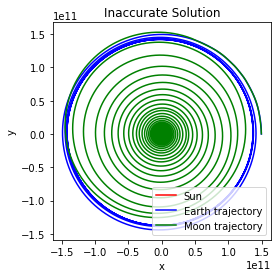

In [148]:
fig=plt.figure()
fig.add_subplot(1,1,1).set_aspect(1)
plt.title("Inaccurate Solution")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(problem3Body1.y[0],problem3Body1.y[1],color='red',label='Sun')
plt.plot(problem3Body1.y[3],problem3Body1.y[4],color='blue',label='Earth trajectory')
plt.plot(problem3Body1.y[6],problem3Body1.y[7],color='green',label='Moon trajectory')
plt.legend()
#The output doesn't look good or accurate, as the trajectories are spiral; that's 
#due to the low accuracy of the solver, and that's because our units
# (e.g: the time) are very large.

In [149]:
#to solve this, we have to decrease the relative tolerence and the absolute tolerence of the solver.
problem3Body1=integrate.solve_ivp(f,[t0,tFinal],r0,method='RK45',t_eval=time, rtol=0.000001*1e-3,atol=0.000001*1e-6)
#rtol: relative tolerence, by default is equal to 1e-3
#atol: abslute tolerence, by default is equal to 1e-6


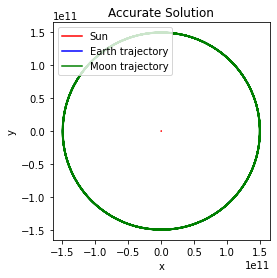

In [150]:
fig=plt.figure()
fig.add_subplot(1,1,1).set_aspect(1)
plt.title("Accurate Solution")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(problem3Body1.y[0],problem3Body1.y[1],color='red',label='Sun')
plt.plot(problem3Body1.y[3],problem3Body1.y[4],color='blue',label='Earth trajectory')
plt.plot(problem3Body1.y[6],problem3Body1.y[7],color='green',label='Moon trajectory')
plt.legend()
#and now the output is correct.

* Sun trajectory

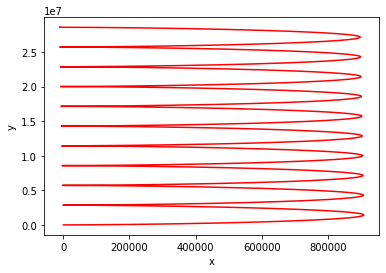

In [151]:
plt.xlabel('x')
plt.ylabel('y')
plt.plot(problem3Body1.y[0],problem3Body1.y[1],color='red',label='Sun trajectory')
#The sun isn't fixed as it's affected by the earth and the moon, however, its trajectory 
# is relatively negligible compared to the earth and moon ones.

* Earth trajectory

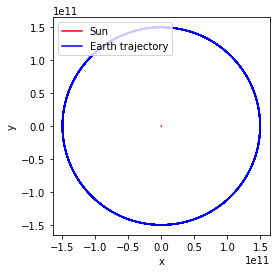

In [152]:
fig=plt.figure()
fig.add_subplot(1,1,1).set_aspect(1)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(problem3Body1.y[0],problem3Body1.y[1],color='red',label='Sun')
plt.plot(problem3Body1.y[3],problem3Body1.y[4],color='blue',label='Earth trajectory')
plt.legend()

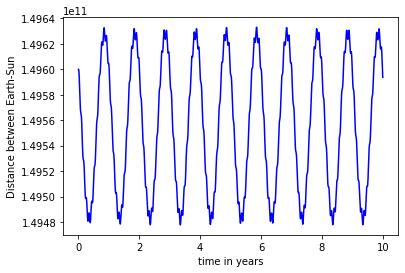

In [153]:
# let's see how the position of the earth changes with respect to time
plt.xlabel("time in years")
plt.ylabel("Distance between Earth-Sun")
plt.plot(problem3Body1.t/(secondsToYears),
    np.linalg.norm(problem3Body1.y[3:6]-problem3Body1.y[0:3],axis=0)
    ,color='blue',label='Earth-Sun')
#we can see from the plot that it takes one year for the earth to move around the sun.

* Moon trajectory

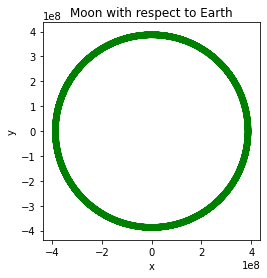

In [154]:
fig=plt.figure()
fig.add_subplot(1,1,1).set_aspect(1)
plt.title('Moon with respect to Earth')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(problem3Body1.y[6]-problem3Body1.y[3],
         problem3Body1.y[7]-problem3Body1.y[4],
         color='green',
         )

#The moon circulates the Earth. 
#You may think that the thick line is inaccuracy; because the radius is changing, 
#and the solver can't determine it accurately. That's not the case, it's because the 
#moon circulates the Earth while the Earth circulates the sun, so there's a kind of spiral 
#motion in the moon's trajectory, as I'm going to show.

* Increasing the radius of the moon to visulaiz
 
(The following plot doesn't represent a physical simulation, but it's for visualization)

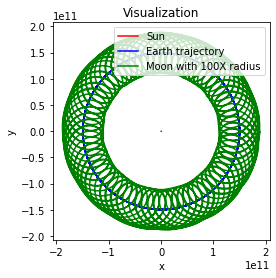

In [155]:
fig=plt.figure()
fig.add_subplot(1,1,1).set_aspect(1)
plt.title('Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(problem3Body1.y[0],problem3Body1.y[1],color='red',label='Sun')
plt.plot(problem3Body1.y[3],problem3Body1.y[4],color='blue',label='Earth trajectory')
plt.plot(problem3Body1.y[3]+100*(problem3Body1.y[6]-problem3Body1.y[3]),
         problem3Body1.y[4]+100*(problem3Body1.y[7]-problem3Body1.y[4]),
         color='green',label='Moon with 100X radius')
plt.legend()
#now you can understand the thick line in the above plot

### Inclination of the moon

In [156]:
# if we were to add a small starting velocity in the z-direction of the moon, we can see it's small inclination
vMoon0=np.array([-vMoon,vEarth,0.01])
numYears=1
tFinal=secondsToYears*numYears
nMax=100001
time=np.linspace(t0,tFinal,nMax)
r0=np.concatenate([rSun0,rEarth0,rMoon0,vSun0,vEarth0,vMoon0])
problem3Body2=integrate.solve_ivp(f,[t0,tFinal],r0,method='RK45',t_eval=time, rtol=0.000001*1e-3,atol=0.000001*1e-6)

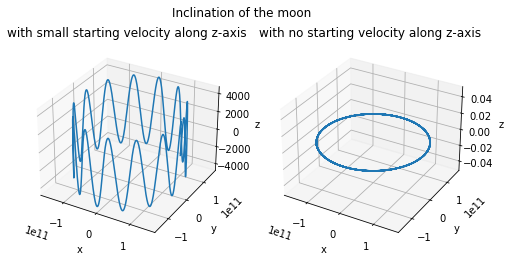

In [157]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle('Inclination of the moon')
ax1=fig.add_subplot(1, 2, 1, projection='3d')
ax2=fig.add_subplot(1, 2, 2, projection='3d')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
ax1.set_zlabel('z')
ax1.set_title('with small starting velocity along z-axis')
ax1.plot3D(
    problem3Body2.y[6],
    problem3Body2.y[7],
    problem3Body2.y[8],
)
ax2.set_ylabel('y')
ax2.set_xlabel('x')
ax2.set_zlabel('z')
ax2.set_title('with no starting velocity along z-axis')
ax2.plot3D(
    problem3Body1.y[6],
    problem3Body1.y[7],
    problem3Body1.y[8],
)
plt.show()
